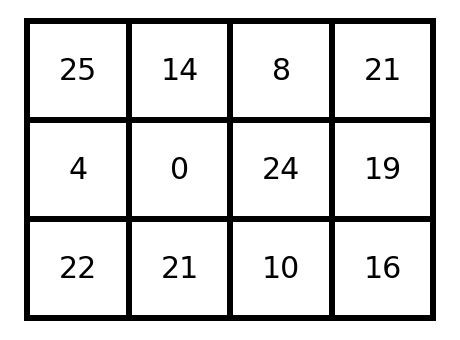

You may use everything in python and math library to construct your equation.
Remember to use suitable syntax, use double '=' and put space between numbers. E.g. '24 == 17 + 7'
Please input your name: zjy
Input your answer! Quick!:
14 + 10 = 24
Invalid syntax detected! Please try again.
Input your answer! Quick!:
14 + 10 == 24
Your score now is:3
Please keep up!


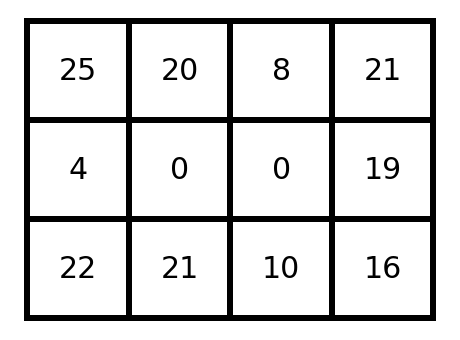

970.0 second left!
Number of cards used: 3
Number of cards remaining: 49
Input your answer! Quick!:
0 == 0
Your score now is:5
Please keep up!


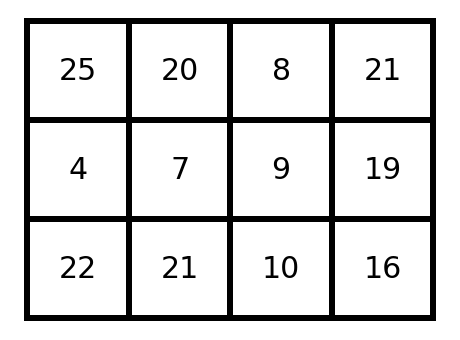

966.0 second left!
Number of cards used: 5
Number of cards remaining: 47
Input your answer! Quick!:
10 + 9 = 19
Invalid syntax detected! Please try again.
Input your answer! Quick!:
10 + 9 == 19
Your score now is:8
Please keep up!


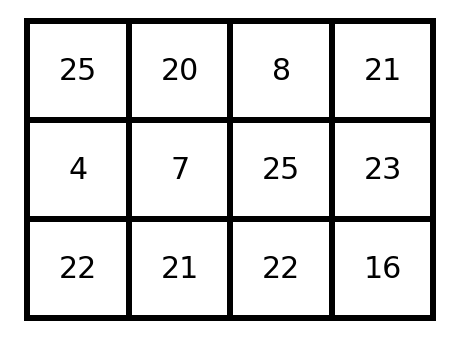

939.0 second left!
Number of cards used: 8
Number of cards remaining: 44
Input your answer! Quick!:
22 == 22
Your score now is:10
Please keep up!


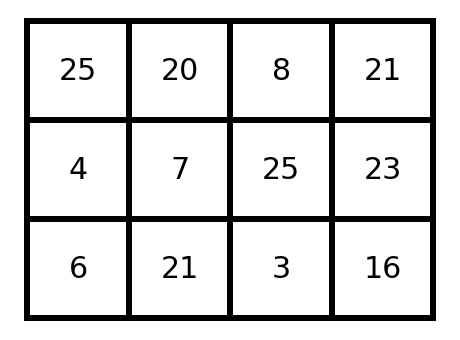

660.0 second left!
Number of cards used: 10
Number of cards remaining: 42


KeyboardInterrupt: Interrupted by user

In [2]:
#Code begins

import matplotlib.pyplot as plt 
import math, time, random

#------------------------------------------------------------------

# making a deck from numbers 0 to 25
# with 2 of the same numbers in the deck

def deck_build():
    deck = [i for i in range(0,26)]
    for index,i in enumerate(deck):
        deck[index] = str(i)
    deck = 2*deck   
    return deck

#------------------------------------------------------------------

# mixing the deck randomly (3 times for ‘extra randomness’)

def shuffle_deck(deck):
    random.shuffle(deck)
    random.shuffle(deck)
    random.shuffle(deck)
    for i in range(12):
        deck.append("-")
    return(deck)

#------------------------------------------------------------------

# making 3 nested list with 4 elements inside
# substitute each slot following the order of the shuffled deck

def start_board(deck):
    number_list = [i for i in range(1,17)]
    board=[]
    for index,i in enumerate(number_list):
        if index<(len(number_list)/4):
            board+=[number_list[index*3:(index)*3+3]]
    n = 0
    for index_row,a in enumerate(board):
        for index_col, b in enumerate(a):
            board[index_row][index_col] = deck[n]
            n+=1
    return board

#------------------------------------------------------------------

# Using the list of nested lists, display using matplotlib
# it will show a 3x4 grid with its respective numbers inside

def display(board): 
    plt.subplots(figsize = (8, 6)) 
    #thickness of lines 
    lw = 6 
    #Drawing the Grid 
    plt.plot([0, 0], [0, 6], c = 'k', linewidth = lw) 
    plt.plot([2, 2], [0, 6], c = 'k', linewidth = lw) 
    plt.plot([4, 4], [0, 6], c = 'k', linewidth = lw) 
    plt.plot([6, 6], [0, 6], c = 'k', linewidth = lw) 
    plt.plot([8, 8], [0, 6], c = 'k', linewidth = lw) 
    plt.plot([0, 8], [0, 0], c = 'k', linewidth = lw) 
    plt.plot([0, 8], [2, 2], c = 'k', linewidth = lw) 
    plt.plot([0, 8], [4, 4], c = 'k', linewidth = lw) 
    plt.plot([0, 8], [6, 6], c = 'k', linewidth = lw) 
    #Writing the numbers in the boxes based on board 
    for index_x, x in enumerate(board): 
        for index_y, y in enumerate(x): 
            plt.text((index_x*2)+1,(index_y*2)+1, y , ha="center", va="center", size = 30) 
 
    plt.axis("off") 
    plt.show()

#------------------------------------------------------------------

#turns board to simple list, to be used to check if numbers are in equation are indeed from the board

def traverse_board(board):
    ls = []
    for i in range(len(board)):
        n = board[i]
        for j in range(len(n)):
            try:
                ls.append(int(board[i][j]))
            except ValueError:
                pass
    return ls

#------------------------------------------------------------------

# Ask for user's name and gives instructions to the game
def username():
    print("You may use everything in python and math library to construct your equation.")
    print("Remember to use suitable syntax, use double '=' and put space between numbers. E.g. '24 == 17 + 7'")
    name = input('Please input your name: ')
    return name

#------------------------------------------------------------------

# Check if input is correct and with correct syntax
# Print error message if they are not

def check_equ_correctness(board):
    while True:
        try:
            equation = input("Input your answer! Quick!:\n")
            ls1 = traverse_board(board)
            ls2 = ls1.copy()
            global score
            digits = [int(s) for s in equation.split() if s.isdigit()]
            if eval(equation) and ('=' in equation):
                for i in digits:
                    if (i in ls1):
                        ls1.remove(i)
                    else:
                        print("Sorry, please try again.")
                        ls1 = ls2
                        digits = []
                        break

            else:
                print("Sorry, please try again.")
                digits = []

            score = score + len(ls2) - len(ls1)
            print('Your score now is:{}'.format(score))
            print('Please keep up!')
            ls1 = ls2
            return digits
            break
        except SyntaxError:
            print("Invalid syntax detected! Please try again.")
        except NameError:
            print("Please input numbers, not letter or things like this.")
        except TypeError:
            print("Type error detected! Please try again.")

#------------------------------------------------------------------
#replace cards on board

def replace_board(deck):
    y = check_equ_correctness(board)
    for i in range(len(y)):
        global x
        number = str(y[i])
        a = deck.index(number)
        deck[a] = deck[x]
        x += 1
    return deck

#------------------------------------------------------------------

# Game code
deck = deck_build()
shuffle_deck(deck)
board = start_board(deck)
display(board)
name = username()

# Starting parameters
x=12
score = 0
counter = 0
time_duration = 999

# time
time_start = time.time()

while time.time() < time_duration + time_start:
        if x<64:
            replace_board(deck)
            board = start_board(deck)
            display(board)
            print(round(time_duration - (time.time() - time_start),0),"second left!")
            print ("Number of cards used:", x-12)
            print ("Number of cards remaining:", 64-x)
        else:
            print("You have finished all of the cards! Congratulations!")
            print("Your score is {}, you are a genius!".format(score))
            break
        
        
if x < 64:
    print('time over')
    if score > 10:
        print("Your score is {}, you are a genius!".format(score))
    elif score > 5:
        print("Your score is {}, congratulations!".format(score))
    else:
        print("Your score is {}".format(score))

### 